## Ayat_Qabeel_NLP_Task 
#### Hello everyone in this task I will develop a model that takes a text of an address and verify if this address is in the Cairo governorate or not

#### Let's start installing our packages

In [42]:
!pip3 install spacy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
!python -m spacy download en_core_web_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.5 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


#### Import packages

In [44]:
import spacy
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### upload the data

In [45]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Files/address.csv")

In [46]:
data.head(10)

,ISO,Country,Region,City,Postcode,Street,Latitude,Longitude
0,EG,Egypt,Al Sharqia Governorate,10th of Ramadan City,44629.0,Ahmed Ibn Hanbal Street,30.300077,31.779970
1,EG,Egypt,Al Sharqia Governorate,10th of Ramadan City,44629.0,Al Imam Al Shafie Street,30.299554,31.759393
2,EG,Egypt,Al Sharqia Governorate,10th of Ramadan City,44629.0,Asad Allah Street,30.299746,31.755107
3,EG,Egypt,Al Sharqia Governorate,10th of Ramadan City,44629.0,Belbes - 10th of Ramadan Road,30.297967,31.677971
4,EG,Egypt,Al Sharqia Governorate,10th of Ramadan City,44634.0,Masr Al Nour Road,30.297831,31.685978
5,EG,Egypt,Al Sharqia Governorate,10th of Ramadan City,44629.0,Mohamed Hafez Street,30.299745,31.744319
6,EG,Egypt,Al Sharqia Governorate,10th of Ramadan City,44629.0,Omar Ibn Abd Al Aziz Street,30.299877,31.740031
7,EG,Egypt,Al Sharqia Governorate,10th of Ramadan City,44629.0,Omar Ibn Al Khatab Street,30.300369,31.729908
8,EG,Egypt,Al Sharqia Governorate,10th of Ramadan City,44634.0,Omar Ibn Al Khatab Street,30.299382,31.725197
9,EG,Egypt,Al Sharqia Governorate,10th of Ramadan City,44629.0,Othman Ibn Affan Street,30.297660,31.697372


 We see the data with columns like (ISO, Country,	Region,	City,	Postcode,	Street,	Latitude,	Longitude), but we need only (street and City) so, Let's make this


In [47]:
dataset = data[["Street","City"]]


In [48]:
dataset.head()

,Street,City
0,Ahmed Ibn Hanbal Street,10th of Ramadan City
1,Al Imam Al Shafie Street,10th of Ramadan City
2,Asad Allah Street,10th of Ramadan City
3,Belbes - 10th of Ramadan Road,10th of Ramadan City
4,Masr Al Nour Road,10th of Ramadan City


What is en_core_web_md ?
it's a medium English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities.

In [49]:
nlp = spacy.load("en_core_web_md")

let's make a vector for each word  in the sentence like "Ayat Qabeel" --> [Ayat, v], [Qabeel, v] -> "2 words" "2 vectors" . But we have sentences of different sizes in our data so,we make a Padding ---> We will choose the longest sentence to make a matrix on our code


In [50]:
def get_longest_text(texts):
    longest_input = 0
    for text in texts:
        text_len= len(text.split())
        longest_input = max(longest_input, text_len)
    return longest_input

In [51]:
longest_input = get_longest_text(dataset['Street'])
longest_input

9

In [52]:
longest_input = 11

In [53]:
data_emb = np.zeros((len(dataset), longest_input, 300))
for i, text in enumerate(tqdm(nlp.pipe(dataset['Street']), total=len(dataset))):
    for j, token in enumerate(text):
        data_emb[i, j] = token.vector

  0%|          | 0/149 [00:00<?, ?it/s]

In [54]:
# prepare y
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(dataset['City'])
y_encoded = to_categorical(y_encoded)

In [55]:
y_encoded[:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 

#### Let's start building our model

In [56]:
import tensorflow as tf

# define the network
inputs = tf.keras.layers.Input((longest_input, 300))
reshaped = tf.keras.layers.Reshape((longest_input, 300, 1))(inputs)


filters = [2, 3, 4]

# define the conv net
conv_1 = tf.keras.layers.Conv2D(100, (filters[0], 300), activation='relu')(reshaped)
conv_2 = tf.keras.layers.Conv2D(100, (filters[1], 300), activation='relu')(reshaped)
conv_3 = tf.keras.layers.Conv2D(100, (filters[2], 300), activation='relu')(reshaped)

# define max-pooling
pool_1 = tf.keras.layers.MaxPooling2D((longest_input - filters[0] + 1, 1), strides=(1,1))(conv_1)
pool_2 = tf.keras.layers.MaxPooling2D((longest_input - filters[1] + 1, 1), strides=(1,1))(conv_2)
pool_3 = tf.keras.layers.MaxPooling2D((longest_input - filters[2] + 1, 1), strides=(1,1))(conv_3)

# concatenate the convs
merged_tensor = tf.keras.layers.concatenate([pool_1, pool_2, pool_3], axis=1)

# now flatten them and add a dense layer
flatten = tf.keras.layers.Flatten()(merged_tensor)

# add a dense layer
clf = tf.keras.layers.Dense(100, activation='relu')(flatten)

# add final output
clf = tf.keras.layers.Dense(len(encoder.classes_), activation='softmax')(clf)

#### compile the model

In [57]:
model = tf.keras.models.Model(inputs, clf)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 11, 300)]    0           []                               
                                                                                                  
 reshape_1 (Reshape)            (None, 11, 300, 1)   0           ['input_2[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 10, 1, 100)   60100       ['reshape_1[0][0]']              
                                                                                                  
 conv2d_4 (Conv2D)              (None, 9, 1, 100)    90100       ['reshape_1[0][0]']              
                                                                                            

#### We will draw our model to see it on an image

In [58]:
!pip install pydot graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


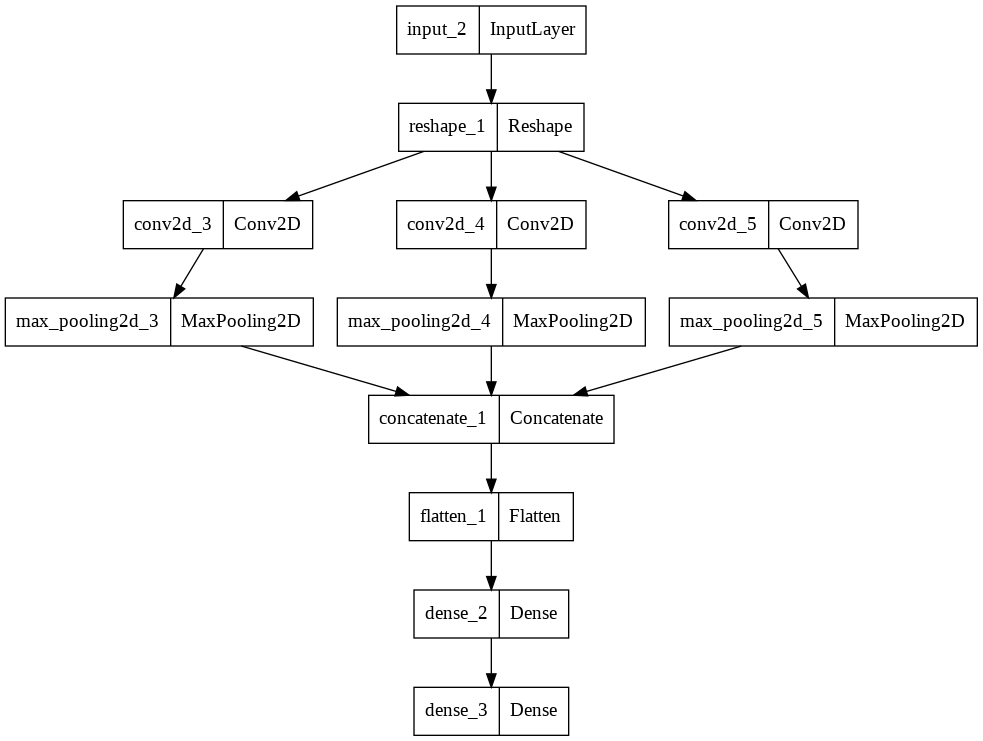

In [59]:
tf.keras.utils.plot_model(
    model, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

#### let's split the data and train our model

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_emb, y_encoded, test_size=.2, random_state=42)

In [61]:
# train our model
model.fit(x_train, y_train, epochs=23)

Epoch 1/23
4/4 [==============================] - 1s 31ms/step - loss: 3.8912 - acc: 0.1261
Epoch 2/23
4/4 [==============================] - 0s 28ms/step - loss: 3.4665 - acc: 0.4874
Epoch 3/23
4/4 [==============================] - 0s 34ms/step - loss: 3.1224 - acc: 0.5378
Epoch 4/23
4/4 [==============================] - 0s 25ms/step - loss: 2.8502 - acc: 0.6050
Epoch 5/23
4/4 [==============================] - 0s 30ms/step - loss: 2.6090 - acc: 0.6723
Epoch 6/23
4/4 [==============================] - 0s 28ms/step - loss: 2.3886 - acc: 0.7143
Epoch 7/23
4/4 [==============================] - 0s 36ms/step - loss: 2.1624 - acc: 0.7563
Epoch 8/23
4/4 [==============================] - 0s 30ms/step - loss: 1.9831 - acc: 0.7983
Epoch 9/23
4/4 [==============================] - 0s 31ms/step - loss: 1.8262 - acc: 0.7899
Epoch 10/23
4/4 [==============================] - 0s 29ms/step - loss: 1.7100 - acc: 0.8235
Epoch 11/23
4/4 [==============================] - 0s 24ms/step - loss: 1.5804 

#### making evaluation

In [62]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 176ms/step - loss: 7.5859 - acc: 0.4333


[7.5858869552612305, 0.4333333373069763]

The accuracy is low because we made a complexity model and we train it with a low size of data so we need a huge size of data to train it

In [63]:
encoder.classes_[4]

'Al Busayli'

#### Let's make some prediction

In [64]:
text = "Ahmed Ibn Hanbal Street	"
text_v = np.zeros((1, longest_input, 300))
for i, token in enumerate(nlp(text)):
    if i>=longest_input:
        break
    text_v[0, i] = token.vector
predictions = model.predict(text_v)
predictions

array([[9.80089664e-01, 1.43756888e-05, 6.19172422e-11, 6.25874281e-06,
        3.87940666e-15, 2.04281520e-07, 5.69032181e-07, 5.77308356e-07,
        2.40107614e-08, 2.38594498e-06, 2.78247625e-09, 1.02077913e-03,
        9.83893589e-09, 2.01889503e-12, 2.32437827e-07, 1.60075599e-11,
        8.98735470e-06, 3.51239403e-04, 1.72810834e-02, 1.05653055e-06,
        1.48484469e-06, 1.72408659e-06, 7.64686035e-07, 1.01456098e-05,
        1.31587257e-07, 1.97363511e-06, 1.08211383e-03, 3.03891761e-06,
        8.57347516e-07, 3.07397272e-07, 5.57185054e-08, 1.53408322e-07,
        7.21959077e-05, 2.58773753e-07, 2.42133156e-05, 6.94392975e-06,
        6.07569290e-12, 2.41585875e-12, 3.84155919e-06, 8.34485036e-06,
        4.16028257e-07, 9.67404929e-08, 9.45092836e-07, 2.17632063e-07,
        1.15218796e-07, 2.17323782e-06, 7.70950748e-10, 1.21411551e-14,
        1.18757422e-08, 1.75869125e-10, 8.40785752e-09, 6.76402158e-14]],
      dtype=float32)

In [65]:
np.argmax(predictions)

0

In [66]:
for label, prob in zip(encoder.classes_, predictions[0]):
    print((label, round(prob, 3)))

('10th of Ramadan City', 0.98)
('Abu Qir', 0.0)
('Abu Simbel', 0.0)
('Al Atawi', 0.0)
('Al Busayli', 0.0)
('Al Damairah', 0.0)
('Al Hasayina', 0.0)
('Al Helsamiya', 0.0)
('Al Nubaria', 0.0)
('Al-Mahmudiya', 0.0)
('Al-Salheya Al-Gedida', 0.0)
('Alexandria', 0.001)
('Aswan', 0.0)
('Atf Ifwah', 0.0)
('Az Zarqa', 0.0)
('Bahnabai', 0.0)
('Beni Suef', 0.0)
('Bilqas', 0.0)
('Cairo', 0.017)
('Dauwar Masri', 0.0)
('El Senbellawein City', 0.0)
('Ezab Arab al Tahawiya', 0.0)
('Ezab Nubar', 0.0)
('Hawsh Isa', 0.0)
('Idku', 0.0)
('Ihnasya al Madinah', 0.0)
('Itay el-Barud', 0.001)
('Izbat Abu Laban', 0.0)
('Izbat Hasan Kasibah', 0.0)
('Izbat Kawm al Kalakh', 0.0)
('Izbat Musaid', 0.0)
('Izbat Suwaylim', 0.0)
('Izbat al Hakim', 0.0)
('Izbat al Muhit', 0.0)
('Izbat al Shaykh al Maraghi', 0.0)
('Kafr Farag Girgis', 0.0)
('Kafr Saqr', 0.0)
('Minshat Safwat', 0.0)
('Minya Al-Qamh', 0.0)
('Mit Yazid', 0.0)
('Mit al Khawli Abd Allah', 0.0)
('Naj al Hawsh', 0.0)
('Nazlet Abu Silim', 0.0)
('Noub', 0.0)
('Qa

In [67]:
def predict_n_gram(text):
    text_v = np.zeros((1, longest_input, 300))
    for i, token in enumerate(nlp(text)):
        if i>=longest_input:
            break
        text_v[0, i] = token.vector
    # predict the input 
    prediction = model.predict(text_v)
    label = encoder.classes_[np.argmax(prediction)]
    return label

In [68]:
predict_n_gram('انا اسكن فى التجمع الخامس')

'Cairo'

In [69]:
predict_n_gram("انا اسمى ايات و انا اذهب للجمالية صباحا")

'Cairo'

In [70]:
predict_n_gram("شبرا")

'Cairo'

In [71]:
predict_n_gram("Teraa Al Saeidia احب ان اذهب الى")

'Al Helsamiya'

In [72]:
predict_n_gram("Al Moustafa Street انا اعيش فى")

'Minya Al-Qamh'

#### let's save our model to use it in a simple HTTP API

In [74]:
np.save('classes.npy', encoder.classes_)

In [75]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/Colab Notebooks/Data Files/saved_model/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Data Files/saved_model/my_model/assets


In [76]:
from joblib import dump, load

In [77]:
dump(model,'model.joblib')

INFO:tensorflow:Assets written to: ram://835db75b-11af-48cf-a94f-3689a0558277/assets


['model.joblib']

###The End